In [84]:
#Importing Required Libraries 
import numpy as np
import pandas as pd                               
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [85]:
#Path of the Dataset
folder1=r"D:\Tejal\Module-8\Project\Dataset New\Rural"
folder2=r"D:\Tejal\Module-8\Project\Dataset New\Urban"

In [86]:
#folder1 (Rural)
i=0
for filename in os.listdir(folder1):
    #Defining the path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize total  image size to 200 x 200
    resize=(200,200)
    img=cv2.resize(a,resize)
    
    #grayscaling the image dataset
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
        
    # creating a Histograms Equalization for folder1(Fall)
    equ = cv2.equalizeHist(img2)
    #kernels for prewitt edge detection
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) 
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    #Horizontal 
    img_prewittx = cv2.filter2D(equ, -1, kernelx)
    img_prewitty = cv2.filter2D(equ, -1, kernely)
    #Vertical
    img_prewitt = img_prewittx + img_prewitty

    #Applying Brisk Discriptor folder1 (Rural)
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
  
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
  
    #drop first coloumn as it's the no of feature detected. Not required.
    #Append the data to folder1.csv file
    csv_data=out.to_csv('folder1_new.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (1585, 64)
descriptor shape  1  :  (1576, 64)
descriptor shape  2  :  (1266, 64)
descriptor shape  3  :  (1887, 64)
descriptor shape  4  :  (996, 64)
descriptor shape  5  :  (1935, 64)
descriptor shape  6  :  (1280, 64)
descriptor shape  7  :  (1377, 64)
descriptor shape  8  :  (1946, 64)
descriptor shape  9  :  (1086, 64)
descriptor shape  10  :  (1986, 64)
descriptor shape  11  :  (1290, 64)
descriptor shape  12  :  (594, 64)
descriptor shape  13  :  (1652, 64)
descriptor shape  14  :  (1681, 64)
descriptor shape  15  :  (1306, 64)
descriptor shape  16  :  (764, 64)
descriptor shape  17  :  (349, 64)
descriptor shape  18  :  (594, 64)
descriptor shape  19  :  (2218, 64)
descriptor shape  20  :  (1163, 64)
descriptor shape  21  :  (1167, 64)
descriptor shape  22  :  (627, 64)
descriptor shape  23  :  (837, 64)
descriptor shape  24  :  (936, 64)
descriptor shape  25  :  (1469, 64)
descriptor shape  26  :  (852, 64)
descriptor shape  27  :  (610, 64)
descriptor s

In [87]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1_new.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4,96,223,239,131,65,71,127,127,126,...,223,81,160,235,32,150,231,192,254,113
1,128,123,135,129,128,0,97,127,103,78,...,33,176,62,255,255,38,128,59,50,16
2,128,123,223,239,239,193,67,111,255,254,...,254,255,58,238,231,182,153,206,127,44
3,148,123,223,231,235,3,0,79,207,254,...,78,14,217,255,127,24,76,0,193,194
4,52,0,0,14,7,95,126,0,152,176,...,239,3,24,130,254,127,16,140,204,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575492,4,232,95,3,1,224,119,0,0,128,...,0,72,103,159,13,166,177,12,153,58
575493,176,59,215,239,224,215,1,3,0,0,...,2,0,4,139,230,255,191,142,153,59
575494,252,31,227,44,32,64,64,0,0,128,...,223,112,5,0,220,239,27,0,209,50
575495,148,123,199,239,239,223,1,7,0,0,...,34,48,31,253,255,127,30,143,29,50


In [88]:
# folder2(Urban)
i=0
for filename in os.listdir(folder2):
    
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize all images to 200 x 200
    resize=(100,100)
    img=cv2.resize(a,resize)
    #grayscling the images 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     #gaussian Image
    img2= cv2.GaussianBlur(gray,(5,5),0)
   
    # creating a Histograms Equalization of a image using cv2.equalizeHist()
    equ = cv2.equalizeHist(img2)
    #kernels for prewitt edge detection
    kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) 
    kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    #Horizontal
    img_prewittx = cv2.filter2D(equ, -1, kernelx) 
    #Vertical
    img_prewitty = cv2.filter2D(equ, -1, kernely)
    img_prewitt = img_prewittx + img_prewitty

    #brisk code for feature descriptor
    brisk = cv2.BRISK_create()
    keypoint,descriptor = brisk.detectAndCompute(img_prewitt,None)
    

    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptor)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('folder2_new.csv', mode='a', header=False,index=False)

descriptor shape  0  :  (279, 64)
descriptor shape  1  :  (258, 64)
descriptor shape  2  :  (282, 64)
descriptor shape  3  :  (239, 64)
descriptor shape  4  :  (178, 64)
descriptor shape  5  :  (234, 64)
descriptor shape  6  :  (298, 64)
descriptor shape  7  :  (287, 64)
descriptor shape  8  :  (156, 64)
descriptor shape  9  :  (264, 64)
descriptor shape  10  :  (229, 64)
descriptor shape  11  :  (246, 64)
descriptor shape  12  :  (205, 64)
descriptor shape  13  :  (216, 64)
descriptor shape  14  :  (245, 64)
descriptor shape  15  :  (196, 64)
descriptor shape  16  :  (203, 64)
descriptor shape  17  :  (168, 64)
descriptor shape  18  :  (272, 64)
descriptor shape  19  :  (246, 64)
descriptor shape  20  :  (301, 64)
descriptor shape  21  :  (259, 64)
descriptor shape  22  :  (220, 64)
descriptor shape  23  :  (209, 64)
descriptor shape  24  :  (219, 64)
descriptor shape  25  :  (84, 64)
descriptor shape  26  :  (129, 64)
descriptor shape  27  :  (112, 64)
descriptor shape  28  :  (283, 

In [89]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data2= pd.read_csv('folder2_new.csv',header=None,dtype='uint8')
data2=data2.astype(np.uint8)
data2

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,75,0,160,255,159,39,207,239,255,121,...,255,83,0,0,129,192,114,0,196,255
1,0,128,31,135,11,2,132,255,127,96,...,7,0,32,255,97,36,239,119,18,0
2,251,191,255,241,80,160,192,226,34,1,...,216,94,215,104,116,62,255,215,130,161
3,176,17,192,239,103,134,12,127,127,102,...,159,215,103,80,235,33,128,247,127,52
4,255,255,231,113,112,0,128,247,67,0,...,3,0,180,235,116,50,0,242,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97091,0,34,28,135,195,31,55,92,222,8,...,248,252,159,108,16,138,0,192,249,255
97092,132,3,16,13,0,18,100,116,116,234,...,3,130,253,255,127,12,193,64,115,114
97093,0,98,159,199,235,155,7,12,222,184,...,208,153,250,99,16,252,189,0,192,206
97094,75,254,255,247,243,227,255,191,14,9,...,76,108,79,121,1,0,64,52,116,0


In [90]:
#append all the class wise feature descriptor data into one data frame
data=data1.append(data2)

data

C:\Users\ACER\AppData\Local\Temp\ipykernel_15824\3613364136.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4,96,223,239,131,65,71,127,127,126,...,223,81,160,235,32,150,231,192,254,113
1,128,123,135,129,128,0,97,127,103,78,...,33,176,62,255,255,38,128,59,50,16
2,128,123,223,239,239,193,67,111,255,254,...,254,255,58,238,231,182,153,206,127,44
3,148,123,223,231,235,3,0,79,207,254,...,78,14,217,255,127,24,76,0,193,194
4,52,0,0,14,7,95,126,0,152,176,...,239,3,24,130,254,127,16,140,204,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97091,0,34,28,135,195,31,55,92,222,8,...,248,252,159,108,16,138,0,192,249,255
97092,132,3,16,13,0,18,100,116,116,234,...,3,130,253,255,127,12,193,64,115,114
97093,0,98,159,199,235,155,7,12,222,184,...,208,153,250,99,16,252,189,0,192,206
97094,75,254,255,247,243,227,255,191,14,9,...,76,108,79,121,1,0,64,52,116,0


In [91]:
#save appended data into a csv file
csv_data=data.to_csv('finalData_new.csv', mode='a', header=False,index=False)

In [92]:
#read the data from the previously saved csv file
data = pd.read_csv('finalData_new.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,4,96,223,239,131,65,71,127,127,126,...,223,81,160,235,32,150,231,192,254,113
1,128,123,135,129,128,0,97,127,103,78,...,33,176,62,255,255,38,128,59,50,16
2,128,123,223,239,239,193,67,111,255,254,...,254,255,58,238,231,182,153,206,127,44
3,148,123,223,231,235,3,0,79,207,254,...,78,14,217,255,127,24,76,0,193,194
4,52,0,0,14,7,95,126,0,152,176,...,239,3,24,130,254,127,16,140,204,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348377,0,34,28,135,195,31,55,92,222,8,...,248,252,159,108,16,138,0,192,249,255
1348378,132,3,16,13,0,18,100,116,116,234,...,3,130,253,255,127,12,193,64,115,114
1348379,0,98,159,199,235,155,7,12,222,184,...,208,153,250,99,16,252,189,0,192,206
1348380,75,254,255,247,243,227,255,191,14,9,...,76,108,79,121,1,0,64,52,116,0


In [93]:
#Applying Kmeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [94]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model_new.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [95]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([247148, 270127, 562514], dtype=int64), array([0, 1, 2, 3])) 



In [96]:
#performing kmeans prediction on the folder1 with the pretrained kmeans model

#initialising i=0; as it is the first class
i=0
data=[]
#k=0

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100,100)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    
    #append the dataframe into the array 
    data.append(hist[0])
    
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1_new.csv', mode='a',header=False,index=False)

Img 190.jpg
Img 191.jpg
Img 192.jpg
Img 193.jpg
Img 194.jpg
Img 196.jpg
Img 198.jpg
Img 200.jpg
Img 201.jpg
Img 202.jpg
Img 203.jpg
Img 204.jpg
Img 205.jpg
Img 206.jpg
Img 207.jpg
Img 209.jpg
Img 210.jpg
Img 211.jpg
Img 212.jpg
Img 213.jpg
Img 214.jpg
Img 215.jpg
Img 216.jpg
Img 219.jpg
Img 220.jpg
Img 221.jpg
Img 222.jpg
Img 224.jpg
Img 225.jpg
Img 227.jpg
Img 228.jpg
Img 230.jpg
Img 234.jpg
Img 235.jpg
Img 236.jpg
Img 238.jpg
Img 241.jpg
Img 242.jpg
Img 244.jpg
Img 246.jpg
Img 247.jpg
Img 248.jpg
Img 250.jpg
IMG20210523064930.jpg
IMG20210523064944.jpg
IMG20210527095843.jpg
IMG20210613145658.jpg
IMG20210613150019.jpg
IMG20210613150233.jpg
IMG20210613150340.jpg
IMG20210613151308.jpg
IMG20210704183918.jpg
IMG20210704184102.jpg
IMG20210704184203.jpg
IMG20210707073246.jpg
IMG20210707073252.jpg
IMG20210707094542.jpg
IMG20210707101631.jpg
IMG20210707103102.jpg
IMG20210710174723.jpg
rural0.jpeg
rural1.jpeg
rural10.jpeg
rural11.jpeg
rural12.jpeg
rural13.jpeg
rural14.jpeg
rural15.jpg
rural16.j

In [97]:
#performing kmeans prediction on the folder2 with the pretrained kmeans model

#initialising i=1; as its the 2nd class
i=1
data=[]
k=0
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(100,100)
    img=cv2.resize(a,resize)
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Initiate FAST detector
    star = cv2.xfeatures2d.StarDetector_create()
    # Initiate BRIEF extractor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    # find the keypoints with STAR
    kp = star.detect(img,None)
    # compute the descriptors with BRIEF
    keypoints, descriptors = brief.compute(gray, kp)
    
    out=pd.DataFrame(descriptors)

    array_double = np.array(out, dtype=np.double)
    try:
        a=kmeans.predict(array_double)
    except:
        print(filename)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7])
    #append the dataframe into the array 
    data.append(hist[0])
    k=k+1
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder2_new.csv', mode='a',header=False,index=False)

01.jpg
02.jpg
03.jpg
04.jpg
05.jpg
06.jpg
07.jpg
08.jpg
09.jpg
10.jpg
11.jpg
12.jpg
13.png
14.png
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
34.png
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
40.jpg
IMG20230218141355.jpg
IMG20230218141358.jpg
IMG20230218141423.jpg
IMG20230218141503.jpg
IMG20230218141507.jpg
IMG20230218141509.jpg
IMG20230218141514.jpg
IMG20230218141552.jpg
IMG20230218141602.jpg
IMG20230218141604.jpg
IMG20230218141620.jpg
IMG20230218141622.jpg
IMG20230218141624.jpg
IMG20230218141630.jpg
IMG20230218141632.jpg
IMG20230218141635.jpg
IMG20230218141651.jpg
IMG20230218141659.jpg
IMG20230218141701.jpg
Screenshot_2023-04-10-17-54-39-36.jpg
Screenshot_2023-04-10-17-57-33-71.jpg
Screenshot_2023-04-10-17-57-52-23.jpg
Screenshot_2023-04-10-17-57-53-71.jpg
Screenshot_2023-04-10-17-57-55-44.jpg
Screenshot_2023-04-10-17-58-07-32.jpg
Screenshot_2023-04-10-17-58-20-21.jpg
Screenshot_2023-04-10-17-58-2

In [98]:
#Displaying the kmeans predicted data of folder1
print("Rural")
dat1= pd.read_csv('finalFolder1_new.csv',header=None)
print(dat1)

Rural
        0    1    2    3    4    5     6  7
0      39    7   18   16   21   22    60  0
1    1484  170  196  207  238  283   668  0
2     281   51   80   82   68   64   124  0
3     260   44   45   48   48   44   121  0
4       3    1    0    0    0    2     3  0
..    ...  ...  ...  ...  ...  ...   ... ..
549  2008  593  485  505  564  615  1523  0
550  1673  490  463  433  466  485  1177  0
551  1107  375  228  164  151  179   384  0
552  1174  348  162  100  104  109   314  0
553  1067  344  238  132  136  160   395  0

[554 rows x 8 columns]


In [99]:
#Displaying the kmeans predicted data of folder2
print("Urban")
dat2= pd.read_csv('finalFolder2_new.csv',header=None)
print(dat2)

Urban
         0     1     2     3     4     5     6  7
0      343    70    52    55    83    70   115  1
1     1574   310   281   230   293   201   475  1
2     2202   356   446   468   564   503  1152  1
3      723   122   107    95   138   135   246  1
4      589    68    75    83   139   122   253  1
..     ...   ...   ...   ...   ...   ...   ... ..
549  12456  1583  1432  1261  1294  1073  1941  1
550   7671  1408  1208  1097  1177   859  1941  1
551   4042  1683  1103  1304  1279  1253  2499  1
552     54     9     6    12    21    24    44  1
553   1415   257   239   307   334   339   803  1

[554 rows x 8 columns]


In [100]:
#appending All kmeans predicted data into 1 dataframe
A = dat1.append(dat2)
A

C:\Users\ACER\AppData\Local\Temp\ipykernel_15824\2424071763.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A = dat1.append(dat2)


,0,1,2,3,4,5,6,7
0,39,7,18,16,21,22,60,0
1,1484,170,196,207,238,283,668,0
2,281,51,80,82,68,64,124,0
3,260,44,45,48,48,44,121,0
4,3,1,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...
549,12456,1583,1432,1261,1294,1073,1941,1
550,7671,1408,1208,1097,1177,859,1941,1
551,4042,1683,1103,1304,1279,1253,2499,1
552,54,9,6,12,21,24,44,1


In [101]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF_new.csv', mode='a',header=False,index=False)

In [102]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF_new.csv",header=None)
A

,0,1,2,3,4,5,6,7
0,39,7,18,16,21,22,60,0
1,1484,170,196,207,238,283,668,0
2,281,51,80,82,68,64,124,0
3,260,44,45,48,48,44,121,0
4,3,1,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...
2527,12456,1583,1432,1261,1294,1073,1941,1
2528,7671,1408,1208,1097,1177,859,1941,1
2529,4042,1683,1103,1304,1279,1253,2499,1
2530,54,9,6,12,21,24,44,1


In [103]:
df=A

In [104]:
df

,0,1,2,3,4,5,6,7
0,39,7,18,16,21,22,60,0
1,1484,170,196,207,238,283,668,0
2,281,51,80,82,68,64,124,0
3,260,44,45,48,48,44,121,0
4,3,1,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...
2527,12456,1583,1432,1261,1294,1073,1941,1
2528,7671,1408,1208,1097,1177,859,1941,1
2529,4042,1683,1103,1304,1279,1253,2499,1
2530,54,9,6,12,21,24,44,1


In [105]:
rows,columns=df.shape

In [106]:
df.shape

(2532, 8)

In [107]:
df.head()

,0,1,2,3,4,5,6,7
0,39,7,18,16,21,22,60,0
1,1484,170,196,207,238,283,668,0
2,281,51,80,82,68,64,124,0
3,260,44,45,48,48,44,121,0
4,3,1,0,0,0,2,3,0


In [108]:
df.tail()

,0,1,2,3,4,5,6,7
2527,12456,1583,1432,1261,1294,1073,1941,1
2528,7671,1408,1208,1097,1177,859,1941,1
2529,4042,1683,1103,1304,1279,1253,2499,1
2530,54,9,6,12,21,24,44,1
2531,1415,257,239,307,334,339,803,1


In [109]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [110]:
df.describe()

,0,1,2,3,4,5,6,7
count,2.532000e+03,2532.000000,2532.000000,2532.000000,2532.000000,2532.000000,2532.000000,2532.000000
mean,4.684278e+04,6679.241706,6557.453791,6670.757109,6982.964455,6984.022512,15599.377962,0.500000
std,2.134001e+05,25077.322456,24769.727136,24817.693818,25739.906031,24520.969773,54149.097228,0.500099
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.895000e+02,72.250000,75.000000,89.000000,105.000000,111.000000,265.000000,0.000000
50%,1.574000e+03,306.000000,307.000000,360.000000,385.000000,441.000000,974.000000,0.500000
75%,9.726000e+03,1956.000000,2083.000000,2052.000000,2420.750000,2744.000000,6247.000000,1.000000
max,2.876811e+06,256799.000000,246193.000000,248538.000000,245022.000000,232326.000000,572790.000000,1.000000


In [111]:
X = df.drop(columns= 7, axis=1)

In [112]:
Y = df[7]

In [113]:
X

,0,1,2,3,4,5,6
0,39,7,18,16,21,22,60
1,1484,170,196,207,238,283,668
2,281,51,80,82,68,64,124
3,260,44,45,48,48,44,121
4,3,1,0,0,0,2,3
...,...,...,...,...,...,...,...
2527,12456,1583,1432,1261,1294,1073,1941
2528,7671,1408,1208,1097,1177,859,1941
2529,4042,1683,1103,1304,1279,1253,2499
2530,54,9,6,12,21,24,44


In [114]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
2527    1
2528    1
2529    1
2530    1
2531    1
Name: 7, Length: 2532, dtype: int64

#### Train and split

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,
                                                 test_size=0.30, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (1772, 7)
Number transactions y_train dataset:  (1772,)
Number transactions X_test dataset:  (760, 7)
Number transactions y_test dataset:  (760,)


In [116]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

Applying Random Forest

Results obtained on Training Data

Accuracy on Train data :  0.9920993227990971

Presion : 0.9808219178082191

Recall : 1.0

F1 score :  0.9903181189488244

Results obtained on Testing Data

Accuracy on Test data :  0.9907894736842106

Presion : 0.9808219178082191

Recall : 1.0

F1 score :  0.9903181189488244


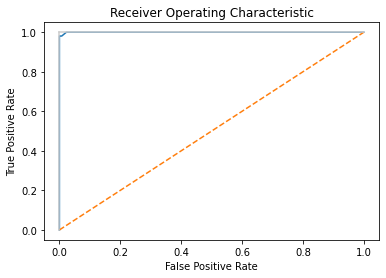

In [117]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##

# plot_confusion_matrix(modelRF, X_test, Y_test) 
# plt.title('Confusion matrix')
# plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print("\033[1m"+'Applying Random Forest'+'\033[0m')

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('\n' +"\033[1m"+ 'Results obtained on Training Data'+'\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))

# Accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\n'+ "\033[1m"+ 'Results obtained on Testing Data'+ '\033[0m')

print('\nAccuracy on Test data : ', test_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))


## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelRF.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Results obtained on Training Data

Accuracy on Train data :  0.8284424379232506

Presion : 0.9808219178082191

Recall : 1.0

F1 score :  0.9903181189488244

Results obtained on Testing Data

Accuracy on Test data :  0.8118421052631579

Presion : 0.9452054794520548

Recall : 0.7371794871794872

F1 score :  0.8283313325330133


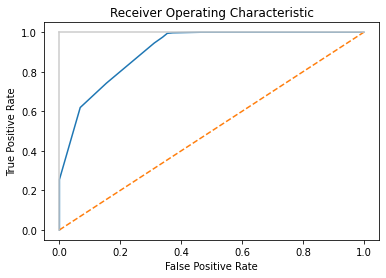

In [118]:
modelDT = DecisionTreeClassifier(max_depth=9)
modelDT.fit(X_train,Y_train)

## produce a confusion matrix ##
# plot_confusion_matrix(modelDT, X_test, Y_test) 
# plt.title('Confusion matrix')
# plt.show() 

# accuracy on training data
X_train_prediction = modelDT.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print('\n' +"\033[1m"+ 'Results obtained on Training Data'+'\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))

# Accuracy on test data
X_test_prediction = modelDT.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\n'+ "\033[1m"+ 'Results obtained on Testing Data'+ '\033[0m')

print('\nAccuracy on Test data : ', test_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))


## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelDT.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Results obtained on Training Data

Accuracy on Train data :  0.9667042889390519

Presion : 0.9452054794520548

Recall : 0.7371794871794872

F1 score :  0.8283313325330133

Results obtained on Testing Data

Accuracy on Test data :  0.9236842105263158

Presion : 0.915068493150685

Recall : 0.925207756232687

F1 score :  0.9201101928374655


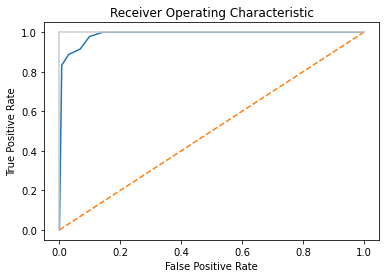

In [119]:
#knn
modelknn=KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# plot_confusion_matrix(modelknn, X_test, Y_test)
# plt.title('Confusion matrix')
# plt.show()
# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)
print('\n' +"\033[1m"+ 'Results obtained on Training Data'+'\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('\n'+ "\033[1m"+ 'Results obtained on Testing Data'+ '\033[0m')

print('\nAccuracy on Test data : ', test_data_accuracy)

print('\nPresion :',precision_score(X_test_prediction,Y_test))

print('\nRecall :',recall_score(X_test_prediction,Y_test))

print('\nF1 score : ', f1_score(X_test_prediction,Y_test))


## produce a ROC plot ##
#obtain prediction probabilities
y_prob = modelknn.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Results obtained on Training Data

Accuracy on Train data :  0.5406320541760722

Presion : 0.5254237288135594

Recall : 0.5095890410958904

F1 score :  0.5173852573018082

Results obtained on Testing Data

Accuracy on Test data :  0.5434210526315789

Presion : 0.5254237288135594

Recall : 0.5095890410958904

F1 score :  0.5173852573018082


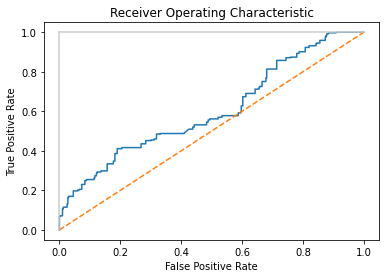

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Initialize logistic regression model
model_lr = LogisticRegression()

# Train the logistic regression model
model_lr.fit(X_train, Y_train)

# Accuracy on training data
train_data_accuracy = model_lr.score(X_train, Y_train)
print('\n' + "\033[1m" + 'Results obtained on Training Data' + '\033[0m')
print('\nAccuracy on Train data : ', train_data_accuracy)

# Precision, recall, and F1-score on test data
X_test_prediction = model_lr.predict(X_test)
print('\nPresion :', precision_score(Y_test, X_test_prediction))
print('\nRecall :', recall_score(Y_test, X_test_prediction))
print('\nF1 score : ', f1_score(Y_test, X_test_prediction))

# Accuracy on test data
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('\n' + "\033[1m" + 'Results obtained on Testing Data' + '\033[0m')
print('\nAccuracy on Test data : ', test_data_accuracy)

# Precision, recall, and F1-score on test data
print('\nPresion :', precision_score(Y_test, X_test_prediction))
print('\nRecall :', recall_score(Y_test, X_test_prediction))
print('\nF1 score : ', f1_score(Y_test, X_test_prediction))

## produce a ROC plot ##
# obtain prediction probabilities
y_prob = model_lr.predict_proba(X_test)
# calculate false & true positive rates
fpr, tpr, _ = roc_curve(Y_test, y_prob[:,1])
# construct plot
plt.plot(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".8"), plt.plot([1, 1], c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


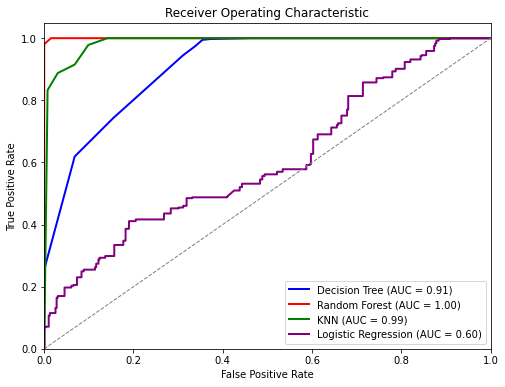

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize models
model_dt = DecisionTreeClassifier(max_depth=9)
model_rf = RandomForestClassifier()
model_knn = KNeighborsClassifier()
model_lr = LogisticRegression()

# Fit models
model_dt.fit(X_train, Y_train)
model_rf.fit(X_train, Y_train)
model_knn.fit(X_train, Y_train)
model_lr.fit(X_train, Y_train)

# Calculate ROC curve and AUC for Decision Tree
y_prob_dt = model_dt.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(Y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve and AUC for Random Forest
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(Y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Calculate ROC curve and AUC for KNN
y_prob_knn = model_knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(Y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Calculate ROC curve and AUC for Logistic Regression
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(Y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_lr, tpr_lr, color='purple', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### K-fold

In [122]:
#Importing required libraries

import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [123]:
#Loading the dataset
df = pd.read_csv("FinalF.csv",header=None) 
#df = data.frame
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [124]:
X

,0,1,2,3,4,5,6
0,152619,27508,23135,20790,20759,20900,44451
1,9479,4006,4035,4692,5428,6706,17488
2,1091,314,329,388,459,553,1922
3,2114,1112,1369,2100,2923,3937,12621
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19995,86815,11503,11624,12242,12622,12381,29532
19996,2921,677,691,583,656,666,1335
19997,3134,859,933,1074,1275,1644,3789
19998,3890,732,756,736,813,861,1799


In [125]:
y

0        0
1        0
2        0
3        0
4        0
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: 7, Length: 20000, dtype: int64

### Random forest

accuracy of each fold - [0.99825, 0.9975, 0.99625, 0.999, 0.995]

Average accuracy : 0.9972
Mean accuracy: 1.00 +/- 0.00
Precision : 0.5095890410958904
Recall : 0.5254237288135594
F1 score :  0.5173852573018082


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:990: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


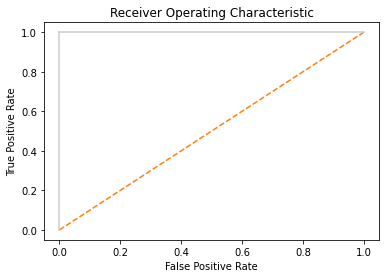

In [126]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelRF1 = RandomForestClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelRF1.fit(X_train,y_train)
    pred_values = modelRF1.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelRF1, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()
# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
# mean_accuracy = sum(acc_score)/k
print('accuracy of each fold - {}'.format(acc_score))
print('\nAverage accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))


# produce a ROC plot ##
# obtain prediction probabilities
y_prob = modelRF1.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Decision Tree

In [127]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelDT1 = DecisionTreeClassifier(max_depth=9)
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelDT1.fit(X_train,y_train)
    pred_values = modelDT1.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelDT1, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()

# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

accuracy of each fold - [0.8385, 0.8155, 0.7465, 0.699, 0.61]
Average accuracy : 0.7419
Mean accuracy: 0.74 +/- 0.00
Precision : 0.5095890410958904
Recall : 0.5254237288135594
F1 score :  0.5173852573018082


### SVM

In [ ]:
k = 3
kf = KFold(n_splits=k, random_state=None)
modelSVM = SVC(kernel='linear', C=1)

acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelSVM.fit(X_train,y_train)
    pred_values = modelSVM.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
plot_confusion_matrix(modelSVM, X_test, y_test)
plt.title('Confusion matrix')
plt.show()

# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

### Logistic regression

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelLR = LogisticRegression(solver= 'liblinear')
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelLR.fit(X_train,y_train)
    pred_values = modelLR.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelLR, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()
 # calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

# ## produce a ROC plot ##
# #obtain prediction probabilities
y_prob = modelLR.predict_proba(X_test)
#calculate false & true positive rates
fpr,tpr,_ = roc_curve(y_test, y_prob[:,1])
#construct plot
plt.plot(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### keighbours

In [ ]:
k = 5
kf = KFold(n_splits=k, random_state=None)
modelknc=KNeighborsClassifier()
 
acc_score = []
 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    modelknc.fit(X_train,y_train)
    pred_values = modelknc.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k
# plot_confusion_matrix(modelknc, X_test, y_test)
# plt.title('Confusion matrix')
# plt.show()

# calculate mean and standard deviation of the scores
mean_accuracy = avg_acc_score.mean()
std_accuracy = acc.std()
print('accuracy of each fold - {}'.format(acc_score))
print('Average accuracy : {}'.format(avg_acc_score))
print("Mean accuracy: {:.2f} +/- {:.2f}".format(mean_accuracy, std_accuracy))
print('Precision :',precision_score(X_test_prediction,Y_test))
print('Recall :',recall_score(X_test_prediction,Y_test))
print('F1 score : ', f1_score(X_test_prediction,Y_test))

### Image prediction

descriptor shape:  (73, 32)


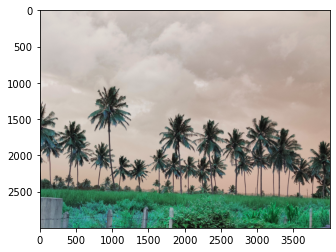

In [128]:
#assigning path with any class image
path = r"D:\Tejal\Module-8\Project\Code\Dataset1\Rural\IMG20210727182011.jpg"
input_image = cv2.imread(path)
plt.imshow(input_image, cmap='gray')

data=[]
   
#resize image
resize=(256,256)
img=cv2.resize(input_image,resize)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Initiate FAST detector
star = cv2.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray, kp)

out=pd.DataFrame(descriptors)
print('descriptor shape: ', out.shape)
out = out.astype(np.uint8)
hist=np.histogram(input_image,bins=[0,1,2,3,4,5,6,7])
#append the dataframe into the array 
data.append(hist[0])

#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)

In [129]:
pred = modelRF1.predict(Output)

print(pred)

[0]


This is  a Rural image 


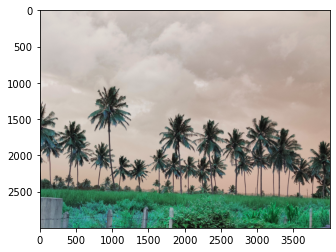

In [130]:
if pred == 0:
    print('This is  a Rural image ')
    plt.imshow(input_image, cmap='gray')

else:
    print('This is an Urban Image')
    plt.imshow(input_image, cmap='gray')

## End